In [4]:
import pandas as pd
data_1 = pd.read_csv('tripadvisor_hotel_reviews.csv')
data_1

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [5]:
!pip install nltk
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\john8\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\john8\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\john8\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
# return the wordnet object value corresponding to the POS tag
import pandas as pd
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

data_1 = pd.read_csv('tripadvisor_hotel_reviews.csv')
data_1['cleaned_review_text'] = data_1['Review'].apply(clean_text)
data_1

,Review,Rating,cleaned_review_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret time stay charm ca n't beat t...
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outside desk staff n't par...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacation hotel open sept gues...


To clean textual data, we call our custom 'clean_text' function that performs several transformations:
- lower the text
- tokenize the text (split the text into words) and remove the punctuation
- remove useless words that contain numbers
- remove useless stop words like 'the', 'a' ,'this' etc.
- Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
- lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

Now that we have cleaned our data, we can do some feature engineering for our modelization part.

In [7]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data_1["sentiments"] = data_1["Review"].apply(lambda x: sid.polarity_scores(x))
data_1 = pd.concat([data_1.drop(['sentiments'], axis=1), data_1['sentiments'].apply(pd.Series)], axis=1)
data_1

,Review,Rating,cleaned_review_text,neg,neu,pos,compound
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,0.072,0.643,0.285,0.9747
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,0.110,0.701,0.189,0.9787
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,0.081,0.700,0.219,0.9889
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,0.060,0.555,0.385,0.9912
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,0.135,0.643,0.221,0.9797
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret time stay charm ca n't beat t...,0.063,0.665,0.272,0.9834
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,0.000,0.570,0.430,0.9753
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outside desk staff n't par...,0.131,0.724,0.145,0.2629
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacation hotel open sept gues...,0.150,0.671,0.179,0.9867


We first start by adding sentiment analysis features because we can guess that customers reviews are highly linked to how they felt about their stay at the hotel. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into accout the context of the sentences to determine the sentiment scores. For each text, Vader retuns 4 values:
- a neutrality score
- a positivity score
- a negativity score
- an overall score that summarizes the previous scores

We will integrate those 4 values as features in our dataset.

In [8]:
# Add number of characters column to data_p
data_1["nb_chars"] = data_1["Review"].apply(lambda x: len(x))

# Add number of words column to data_p
data_1["nb_words"] = data_1["Review"].apply(lambda x: len(x.split(" ")))


Next, we add some simple metrics for every text:
- number of characters in the text
- number of words in the text

In [9]:
import pandas as pd
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data_1["cleaned_review_text"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = data_1["cleaned_review_text"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
data_1 = pd.concat([data_1, doc2vec_df], axis=1)


The next step consist in extracting vector representations for every review. The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks. What's interesting is that similar words will have similar representation vectors.

Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.

We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming data_1 is already loaded
# data_1 = pd.read_csv('your_file.csv')

# Preprocess the text data in the "Review" column
# For this example, I'll use the "Review" column directly, but you should preprocess the text as necessary
data_1['review_clean'] = data_1['Review']
tfidf = TfidfVectorizer(min_df = 10)
# Fit and transform the cleaned text into TF-IDF vectors using the TF-IDF model
tfidf_result_1 = tfidf.fit_transform(data_1["review_clean"]).toarray()

# Create a dataframe with the resulting TF-IDF vectors
tfidf_df_1 = pd.DataFrame(tfidf_result_1, columns=tfidf.get_feature_names_out())
tfidf_df_1.columns = ["word_" + str(x) for x in tfidf_df_1.columns]
tfidf_df_1.index = data_1.index

# Concatenate the TF-IDF vectors with the original dataframe
data_1 = pd.concat([data_1, tfidf_df_1], axis=1)
data_1.head()



,Review,Rating,cleaned_review_text,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_zip,word_zocalo,word_zona,word_zone,word_zones,word_zoo,word_äcor,word_äe,word_äes,word_äs
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,0.072,0.643,0.285,0.9747,593,89,0.727208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,0.110,0.701,0.189,0.9787,1689,252,0.632711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,0.081,0.700,0.219,0.9889,1427,219,1.279969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,0.060,0.555,0.385,0.9912,600,91,0.163545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,0.135,0.643,0.221,0.9797,1281,193,1.165977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finally we add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document. 

But why not simply counting how many times each word appears in every document? The problem with this method is that it doesn't take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.

The TF-IDF metric solves this problem:
- TF computes the classic number of times the word appears in the text
- IDF computes the relative importance of this word which depends on how many texts the word can be found

We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.

In [20]:
# highest positive sentiment reviews (with more than 5 words)
pos_review=data_1[data_1["nb_words"] >= 5].sort_values("pos", ascending = False)[["cleaned_review_text", "pos"]].head(100)
pos_review.head()

,cleaned_review_text,pos
13123,perfect impressive place want clean comfy room...,0.818
4073,hotel great hotel great money clean good restu...,0.799
15066,regular amaze value stay hotel let great bed g...,0.796
10778,fantastic value money good value money great l...,0.792
7709,great hotel love hotel location perfect staff ...,0.787


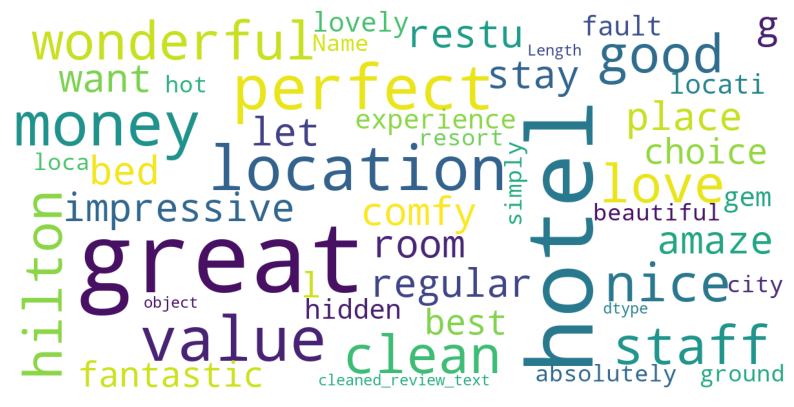

In [22]:
# highest positive sentiment reviews wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 50,
        max_font_size = 50, 
        scale = 3,
        random_state = 0
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(pos_review["cleaned_review_text"])

In [21]:
# lowest negative sentiment reviews (with more than 5 words)
neg_review=data_1[data_1["nb_words"] >= 5].sort_values("neg", ascending = False)[["cleaned_review_text", "neg"]].head(100)
neg_review.head()


,cleaned_review_text,neg
9514,bad hotel really awful place dirty room rude s...,0.646
19891,bad bad bad hotel verry bad pls stay close ram...,0.645
65,hat inn terrible room-service horrible staff u...,0.544
4280,hurry leave really suck terrible food cold cli...,0.529
4740,worn noisy worn noisy remodel future price ref...,0.527


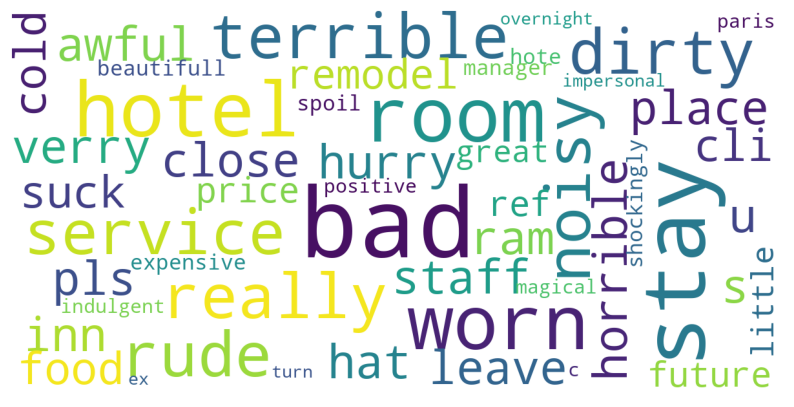

In [23]:
# lowest negative sentiment reviews  wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 50,
        max_font_size = 50, 
        scale = 3,
        random_state = 0
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(neg_review["cleaned_review_text"])

Proportions:
Rating
Positive    0.736567
Negative    0.263433
Name: proportion, dtype: float64


C:\Users\john8\AppData\Local\Temp\ipykernel_29864\348357585.py:60: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  positive_img = Image.fromarray(wordcloud_positive.to_array()).resize((positive_width, height), Image.ANTIALIAS)
C:\Users\john8\AppData\Local\Temp\ipykernel_29864\348357585.py:61: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  negative_img = Image.fromarray(wordcloud_negative.to_array()).resize((negative_width, height), Image.ANTIALIAS)


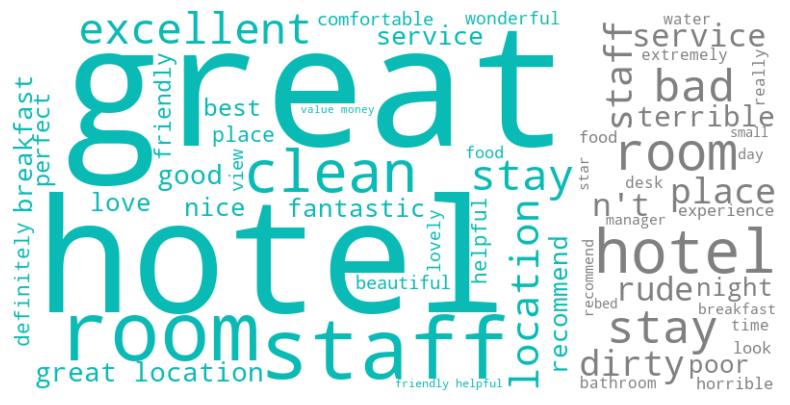

In [28]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Convert 'Rating' column to integers
data['Rating'] = data['Rating'].astype(int)

# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating > 3 and rating <= 5:
        return "Positive"
    if rating > 0 and rating <= 3:
        return "Negative"

data['Rating'] = data['Rating'].apply(ratings)

# Calculate proportions
rating_proportions = data['Rating'].value_counts(normalize=True)
print("Proportions:")
print(rating_proportions)

positive_reviews = data[data['Rating'] == 'Positive']
negative_reviews = data[data['Rating'] == 'Negative']

stopwords = set(STOPWORDS)

total_width = 800
height = 400

positive_width = int(total_width * rating_proportions["Positive"])
negative_width = int(total_width * rating_proportions["Negative"])

# Generate word cloud images for positive and negative reviews
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def tiffany_blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(10,186,181)"  # This is the RGB code for Tiffany Blue color

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(128,128,128)"  # This is the RGB code for Grey color

wordcloud_positive = WordCloud(stopwords=stopwords, background_color="white", max_words=30, width=positive_width, 
height=height, color_func=tiffany_blue_color_func).generate(' '.join(pos_review["cleaned_review_text"]))

wordcloud_negative = WordCloud(stopwords=stopwords, background_color="white", max_words=30, width=negative_width, 
height=height, color_func=grey_color_func).generate(' '.join(neg_review["cleaned_review_text"]))



# Create a white background image
white_bg = Image.new("RGB", (total_width, height), (255, 255, 255))

# Convert word clouds to arrays and resize
positive_img = Image.fromarray(wordcloud_positive.to_array()).resize((positive_width, height), Image.ANTIALIAS)
negative_img = Image.fromarray(wordcloud_negative.to_array()).resize((negative_width, height), Image.ANTIALIAS)

# Combine positive and negative word cloud images
white_bg.paste(positive_img, (0, 0))
white_bg.paste(negative_img, (positive_width, 0))

# Show the combined image
plt.figure(figsize=[10,5])
plt.imshow(white_bg, interpolation="bilinear")
plt.axis("off")
plt.show()

